## Exercise: EDA on the Bike Sharing Dataset

Do exploratory analysis on the bike sharing dataset by calculating and interpreting summary statistics, creating basic plots, and calculating correlations.

Run the following cell to set up our environment.

In [0]:
%run "../Includes/Classroom-Setup"

### Step 1: Summary Statistics

Calculate the count, mean, and standard deviation for each variable in the dataset.  What does each variable signify?  What is the spread of the data?

Import the data.

In [0]:
bikeDF = (spark
  .read
  .option("header", True)
  .option("inferSchema", True)
  .csv("/mnt/training/bikeSharing/data-001/hour.csv")
  .drop("instant", "dteday", "casual", "registered", "holiday", "weekday")
)

Calculate count, mean, and standard deviation.

In [0]:
# ANSWER
display(bikeDF.describe())

summary,season,yr,mnth,hr,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
mean,2.5016399102364923,0.5025605615973301,6.537775476149376,11.546751826917545,0.6827205247712756,1.425283387997008,0.4969871684216586,0.4757751021347581,0.6272288394038822,0.1900976063064631,189.46308763450142
stddev,1.10691813944808,0.5000078290910193,3.4387757137501724,6.9144050952644776,0.4654306335238818,0.6393568777542525,0.19255612124972202,0.1718502156353594,0.19292983406291458,0.12234022857279034,181.3875990918646
min,1,0,1,0,0,1,0.02,0.0,0.0,0.0,1
max,4,1,12,23,1,4,1.0,1.0,1.0,0.8507,977


### Step 2: Plotting

Create the following plots:<br><br>

1. A histogram of the dependent variable `cnt`
2. A barplot of counts by hour
3. A scattermatrix

Create a histogram of the variable `cnt`.

In [0]:
# ANSWER
display(bikeDF.select("cnt")) # Use the plotting functionality to select "histogram"

cnt
16
40
32
13
1
1
2
3
8
14


Create a barplot of counts by hour.

In [0]:
# ANSWER
display(bikeDF.select("cnt", "hr")) # Use the plotting functionality to select "scatterplot"

cnt,hr
16,0
40,1
32,2
13,3
1,4
1,5
2,6
3,7
8,8
14,9


Create a scattermatrix.  This can be done in Python or with the built-in Databricks functionality.

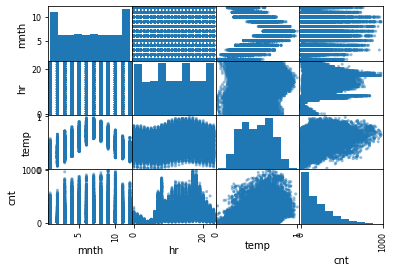

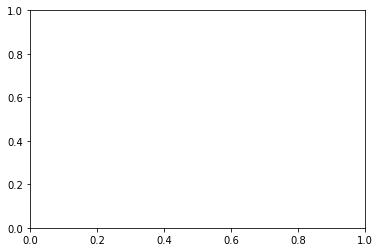

In [0]:
# ANSWER
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # importing for a better color scheme

fig, ax = plt.subplots()
pandasDF = bikeDF.select("mnth", "hr", "temp", "cnt").toPandas()

#pd.scatter_matrix(pandasDF)
pd.plotting.scatter_matrix(pandasDF)

display(fig.figure)

### Step 3: Correlations

Calculate the correlations of the different variables.  Start by using `VectorAssembler` to put all the variables into a single column `features`.

In [0]:
# ANSWER
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=bikeDF.columns, outputCol="features")

bikeFeaturizedDF = assembler.transform(bikeDF)

Calculate the correlation on the transformed `bikeDF`

In [0]:
# ANSWER
from pyspark.ml.stat import Correlation

pearsonCorr = Correlation.corr(bikeFeaturizedDF, 'features').collect()[0][0]
pandasDF = pd.DataFrame(pearsonCorr.toArray())

pandasDF.index, pandasDF.columns = bikeDF.columns, bikeDF.columns

pandasDF

Out[7]:

,season,yr,mnth,hr,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.010742,0.830386,-0.006117,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
workingday,0.013743,-0.002196,-0.003477,0.002285,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,0.150625,-0.083546,0.164411,-0.276498,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.149773,-0.008740,-0.135386,0.137252,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.093234
